**Name:** Trini Kui

**StudentID:** 21204004

# Task 2

Perform EDA with the bank data set by following the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb”.

- Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell). **Section A**
- Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell). **Section B**
- Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell). **Section C**
- Generate two plots with the combined distribution of attributes and draw conclusions from them (approx. 150 words in a markdown cell). **Section C**
- Make sure your conclusions are related to the question you have formulated.

## Etivity Question

From a brief glimpse at the bank.csv file, my question to explore is: **How would familiarity (with the bank), frequency/occurrence and duration of customer contacts affect success of the term deposit campaign?**

My assumption would be that higher familiarity, frequency and duration would lead to more success. Let us see...

## A. Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./bank.csv')
df_success = df.loc[df['subscribed'] == 'yes']
df_failure = df.loc[df['subscribed'] == 'no']
df

age           job   marital  education default  balance housing loan  \
0     32.0    technician    single   tertiary      no      392     yes   no   
1     39.0    technician  divorced  secondary      no      688     yes  yes   
2     59.0       retired   married  secondary      no     1035     yes  yes   
3     47.0   blue-collar   married  secondary      no      398     yes  yes   
4     54.0       retired   married  secondary      no     1004     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0      cellular    1   apr       957         2    131         2  failure   
1      cellular    1   apr       233         2    133         1  failure   
2      cellular    1   apr       126         2    239         1  failure   
3      cellular    1   apr       274         1    238         2  failure   
4      cellular    1   apr       479         1    307         1  failure   
...         ...  ...   ...       ...       ...    ...       ...      ...   
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
0            no  
1            no  
2            no  
3            no  
4            no  
...         ...  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes  

[2000 rows x 17 columns]

## B. Quick Data Exploration (Statistical Portion)

### B.1. Quick Examination of Numerical Attributes

I mainly want to look at attributes that could be more directly related to my question on client contact factors that affect campaign success:

*Duration*
1. `duration` last contact duration, in seconds (numeric). If duration = 0, then subscribed (y) = no

*Frequency/Occurrence & Familiarity*

2. `pdays` number of days that passed by after the client was last contacted from a previous campaign
3. `campaign` number of contacts performed during this campaign and for this client (includes last contact)
4. `previous` number of contacts performed before this campaign and for this client
5. `poutcome` outcome of the previous marketing campaign (categorical: 'failure','nonexistent' [other],'success') **will look at this in B.2 for categorical attributes**

*Success (output variable y)*

6. `subscribed` yes/no if the client has subscribed to the term deposit (from the campaign)

In [5]:
#Non-graphical univariate EDA
print('Full dataset')
display(df.describe())
#display(df.median())
print()
print('Successful dataset')
display(df_success.describe())
#display(df_success.median())
print()
print('Failure dataset')
display(df_failure.describe())
#display(df_failurere.median())

Full dataset


age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000


Successful dataset


age       balance          day     duration     campaign  \
count  997.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean    42.843531   1884.465000    15.339000   377.345000     1.862000   
std     15.382656   3891.864047     8.397893   230.154246     1.310219   
min     18.000000   -205.000000     1.000000    23.000000     1.000000   
25%     31.000000    315.000000     9.000000   224.000000     1.000000   
50%     38.000000    875.000000    14.000000   310.000000     1.000000   
75%     54.000000   2304.500000    22.000000   457.250000     2.000000   
max     93.000000  81204.000000    31.000000  1720.000000    11.000000   

             pdays    previous  
count  1000.000000  1000.00000  
mean    150.392000     2.76100  
std     155.468012     3.50059  
min      -1.000000     0.00000  
25%      -1.000000     0.00000  
50%     123.500000     2.00000  
75%     185.000000     4.00000  
max     854.000000    55.00000


Failure dataset


age       balance          day     duration     campaign  \
count  991.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean    40.655903    942.862000    12.364000   206.696000     1.957000   
std      9.192425   2007.134003    10.667394   175.152259     1.443341   
min     22.000000   -980.000000     1.000000     7.000000     1.000000   
25%     33.000000    114.750000     4.000000    96.000000     1.000000   
50%     39.000000    393.000000     8.000000   155.500000     1.000000   
75%     48.000000    970.250000    27.250000   256.000000     2.000000   
max     64.000000  26306.000000    30.000000  1823.000000    11.000000   

             pdays     previous  
count  1000.000000  1000.000000  
mean    185.400000     2.362000  
std      99.759611     3.287516  
min      -1.000000     0.000000  
25%     136.000000     1.000000  
50%     211.000000     2.000000  
75%     259.000000     3.000000  
max     536.000000    51.000000

**Count** - There should be a total of 2000 entries, but looking at the count, it seems like `age` only has 1988 inputs. The other numerical features that I want to focus on have all 2000 features so it should be good to use if I only look at count.

`duration` - *Mean* Seems like longer calls tend to lead to success (mean of 377.345) compared to shorter calls that lead to failure (mean of 206.696). However, when looking at *standard deviation*, it is higher for successful subscriptions (230.154) vs failure subscriptions (175.152), so the duration of successful calls have a more spread out distribution.

`campaign` Might not be as relevant to answering my question since a successful promo means that fewer calls are required (hence the lower mean of 1.862 for successful dataset). At the same time, a client can outright not subscribe from the first call. Both successful and failure dataset both have min 1 and max 11 calls so it doesn't say much. I tried looking at the distribution for campaign below (see B.1.1), ~50% (542 and 521) of successful and failed subscriptions fall under campaign = 1, so this attribute doesn't look very useful with my question. Although, we can say that clients with a successful subscription generally come to a conclusion (aka decide they want to subscribe) because of the lower mean - maybe failure subscription clients are more uncertain and take time to decide, which could be a potential area of improvement for the sales/marketing team when trying to get clients to subscribe.

`pdays` *Mean* tends to be lower for successful promos (success 150.392 vs failure 185.4). This could show that higher familiarity (aka less days between now and the last contact date for the previous campaign) may lead to higher success. Or it could be that clients not previously contacted, (pdays = -1) are skewing the data. In B.1.2, we do still see that successful subscriptions still have a lower mean (211.629) compared to failures (222.501) but the difference is smaller. 

`previous` *Mean*, the higher frequency that a client was contacted in the previous campaign, the client would likely be more familiar with the bank and its promos, which could lead to a higher success. The success dataset has a mean of 2.761 compared to the failure dataset mean of 2.362. The mean in B.1.2 also agrees with this assumption.

Overall, the *mean* and *standard deviation* is normally higher in the successful dataset even when new clients are excluded (see above and B.1.2). 

#### B.1.1 Check for Campaign (Appendix)

In [35]:
#Univariate non-graphical EDA
print(df_success.groupby('campaign').size())
print(df_failure.groupby('campaign').size())

campaign
1     542
2     243
3     123
4      47
5      20
6      13
7       5
8       3
9       2
11      2
dtype: int64
campaign
1     521
2     263
3      96
4      52
5      30
6      18
7      12
8       3
9       3
10      1
11      1
dtype: int64


#### B.1.2 Check for describe for old clients (Appendix)

In [44]:
#removed pdays = -1 (clients not previously contacted)
print('Successful dataset')
display(df_success.loc[df_success['pdays'] > 0].describe())
print()
print('Failure dataset')
display(df_failure.loc[df_failure['pdays'] > 0].describe())

Successful dataset


age       balance         day     duration    campaign  \
count  710.000000    712.000000  712.000000   712.000000  712.000000   
mean    44.029577   1961.966292   15.261236   364.814607    1.844101   
std     15.332809   4176.481887    8.410312   210.847101    1.303298   
min     19.000000   -205.000000    1.000000    25.000000    1.000000   
25%     32.000000    314.750000    9.000000   222.000000    1.000000   
50%     39.000000    974.000000   14.000000   302.000000    1.000000   
75%     55.750000   2378.250000   22.000000   437.000000    2.000000   
max     93.000000  81204.000000   31.000000  1472.000000   11.000000   

            pdays    previous  
count  712.000000  712.000000  
mean   211.629213    3.877809  
std    144.643254    3.589007  
min      1.000000    1.000000  
25%     94.000000    2.000000  
50%    182.000000    3.000000  
75%    237.250000    5.000000  
max    854.000000   55.000000


Failure dataset


age       balance         day     duration    campaign  \
count  825.000000    834.000000  834.000000   834.000000  834.000000   
mean    41.103030   1030.390887   13.232614   203.105516    2.027578   
std      9.307988   2143.887975   11.485618   174.983878    1.504042   
min     22.000000   -980.000000    1.000000     7.000000    1.000000   
25%     33.000000    150.500000    3.000000    93.250000    1.000000   
50%     39.000000    427.000000    6.000000   150.000000    2.000000   
75%     48.000000   1066.000000   28.000000   250.500000    2.000000   
max     64.000000  26306.000000   30.000000  1823.000000   11.000000   

            pdays    previous  
count  834.000000  834.000000  
mean   222.501199    2.832134  
std     60.275125    3.410051  
min      1.000000    1.000000  
25%    191.250000    1.000000  
50%    241.000000    2.000000  
75%    262.000000    3.000000  
max    536.000000   51.000000

#### B.1.3 Check for describe for new clients (Appendix)

In [14]:
print('Successful dataset')
display(df_success.loc[df_success['pdays'] < 0].describe())
print()
print('Failure dataset')
display(df_failure.loc[df_failure['pdays'] < 0].describe())

Successful dataset


age       balance        day     duration   campaign  pdays  \
count  287.000000    288.000000  288.00000   288.000000  288.00000  288.0   
mean    39.909408   1692.864583   15.53125   408.322917    1.90625   -1.0   
std     15.136632   3075.493895    8.37861   269.993347    1.32842    0.0   
min     18.000000    -27.000000    1.00000    23.000000    1.00000   -1.0   
25%     28.500000    322.500000    8.00000   237.750000    1.00000   -1.0   
50%     35.000000    735.000000   15.50000   327.000000    1.00000   -1.0   
75%     49.000000   1978.000000   22.00000   485.250000    2.00000   -1.0   
max     86.000000  31472.000000   31.00000  1720.000000   11.00000   -1.0   

       previous  
count     288.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0


Failure dataset


age      balance    day     duration    campaign  pdays  \
count  166.000000   166.000000  166.0   166.000000  166.000000  166.0   
mean    38.433735   503.108434    8.0   224.734940    1.602410   -1.0   
std      8.268513   976.655474    0.0   175.411937    1.020276    0.0   
min     24.000000  -768.000000    8.0    14.000000    1.000000   -1.0   
25%     32.000000    28.500000    8.0   108.000000    1.000000   -1.0   
50%     37.000000   195.500000    8.0   183.000000    1.000000   -1.0   
75%     44.000000   544.750000    8.0   283.000000    2.000000   -1.0   
max     60.000000  7317.000000    8.0  1007.000000    8.000000   -1.0   

       previous  
count     166.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0

#### Correlation Matrix

In [18]:
display(df.corr()) #bivariate plot
sns.heatmap(df.corr())

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.139874  0.042411  0.076732 -0.002876  0.009121  0.063805
balance   0.139874  1.000000  0.037078  0.096633  0.025103 -0.033014  0.030292
day       0.042411  0.037078  1.000000  0.058597 -0.019719  0.054188  0.063716
duration  0.076732  0.096633  0.058597  1.000000 -0.005188 -0.095650 -0.015965
campaign -0.002876  0.025103 -0.019719 -0.005188  1.000000  0.030929  0.140995
pdays     0.009121 -0.033014  0.054188 -0.095650  0.030929  1.000000  0.218636
previous  0.063805  0.030292  0.063716 -0.015965  0.140995  0.218636  1.000000

<AxesSubplot:>

There is not much correlation between the inputs. A lot seem close to 0 correlation, but the ones that stand out are `pdays/duration` (-0.09565 negative correlation) and `pdays/previous` (0.218636 positive correlation).

**pdays/duration** - Clients that were contacted less recently for a previous campaign had a shorter call the last time they were contacted - ie. higher `pdays` and lower `duration`. This may be due to the fact that clients provided a response to a previous campaign earlier as they are already familiar with the bank's promotions and don't need to talk as much about the current campaign.

**pdays/previous** -  Clients that weren't contacted recently or at all had a larger number (frequency) of contacts in the past. This could be because they were with the bank longer and may be long standing customers (higher `pdays` and higher `previous`). It could also mean that new clients (pdays = -1) were not contacted before (previous = 0), which could be the likely case. - ie. lower `pdays` and lower `previous`

#### Pairwise Plot

In [21]:
sns.pairplot(data=df.dropna(), hue='subscribed') #bivariate distribution
plt.show()

If we look at the pairwise plot, we do see that there's not much relation between most of the variables. for example, there isn't a clear linear relationship and the data is mostly in random scatters or vague clusters. This confirms what we see in the correlation matrix before. The data may need to be transformed to make the relationship more linear even if the success/failure subscribed data points do not seem linearly-separable at first glance, as there is a lot of overlap between the orange and blue points. We do see that there are some outliers, which we can see in the histograms and box plots in section C later. 

### B.2. Quick Examination of Categorical Attributes

In [158]:
def examine_categories(df):
    print(df.groupby('job').size())
    print('Total category count: ',df['job'].count(),'| Missing count: ',df.shape[0]-df['job'].count())
    print()
    print(df.groupby('marital').size())
    print('Total category count: ',df['marital'].count(),'| Missing count: ',df.shape[0]-df['marital'].count())
    print()
    print(df.groupby('education').size())
    print('Total category count: ',df['education'].count(),'| Missing count: ',df.shape[0]-df['education'].count())
    print()
    print(df.groupby('default').size())
    print('Total category count: ',df['default'].count(),'| Missing count: ',df.shape[0]-df['default'].count())
    print()
    print(df.groupby('housing').size())
    print('Total category count: ',df['housing'].count(),'| Missing count: ',df.shape[0]-df['housing'].count())
    print()
    print(df.groupby('loan').size())
    print('Total category count: ',df['loan'].count(),'| Missing count: ',df.shape[0]-df['loan'].count())
    print()
    print(df.groupby('contact').size())
    print('Total category count: ',df['contact'].count(),'| Missing count: ',df.shape[0]-df['contact'].count())
    print()
    print(df.groupby('poutcome').size())
    print('Total category count: ',df['poutcome'].count(),'| Missing count: ',df.shape[0]-df['poutcome'].count())
    print()
    print(df.groupby('subscribed').size())
    print('Total category count: ',df['subscribed'].count(),'| Missing count: ',df.shape[0]-df['subscribed'].count())

In [159]:
examine_categories(df)

job
admin.           247
blue-collar      298
entrepreneur      45
housemaid         35
management       461
retired          162
self-employed     64
services         165
student           96
technician       348
unemployed        69
dtype: int64
Total category count:  1990 | Missing count:  10

marital
divorced     215
married     1111
single       674
dtype: int64
Total category count:  2000 | Missing count:  0

education
primary      217
secondary    995
tertiary     684
dtype: int64
Total category count:  1896 | Missing count:  104

default
no     1985
yes      15
dtype: int64
Total category count:  2000 | Missing count:  0

housing
no     1037
yes     963
dtype: int64
Total category count:  2000 | Missing count:  0

loan
no     1750
yes     250
dtype: int64
Total category count:  2000 | Missing count:  0

contact
cellular     1663
telephone     146
dtype: int64
Total category count:  1809 | Missing count:  191

poutcome
failure    955
other      147
success    444
dtype: int64
To

In [160]:
examine_categories(df_success) #more for section C.2

job
admin.           130
blue-collar       77
entrepreneur      15
housemaid         20
management       251
retired          136
self-employed     35
services          50
student           87
technician       144
unemployed        48
dtype: int64
Total category count:  993 | Missing count:  7

marital
divorced     94
married     501
single      405
dtype: int64
Total category count:  1000 | Missing count:  0

education
primary       84
secondary    451
tertiary     396
dtype: int64
Total category count:  931 | Missing count:  69

default
no     999
yes      1
dtype: int64
Total category count:  1000 | Missing count:  0

housing
no     797
yes    203
dtype: int64
Total category count:  1000 | Missing count:  0

loan
no     957
yes     43
dtype: int64
Total category count:  1000 | Missing count:  0

contact
cellular     885
telephone     91
dtype: int64
Total category count:  976 | Missing count:  24

poutcome
failure    167
other      111
success    434
dtype: int64
Total category coun

In [161]:
examine_categories(df_failure) #more for section C.2

job
admin.           117
blue-collar      221
entrepreneur      30
housemaid         15
management       210
retired           26
self-employed     29
services         115
student            9
technician       204
unemployed        21
dtype: int64
Total category count:  997 | Missing count:  3

marital
divorced    121
married     610
single      269
dtype: int64
Total category count:  1000 | Missing count:  0

education
primary      133
secondary    544
tertiary     288
dtype: int64
Total category count:  965 | Missing count:  35

default
no     986
yes     14
dtype: int64
Total category count:  1000 | Missing count:  0

housing
no     240
yes    760
dtype: int64
Total category count:  1000 | Missing count:  0

loan
no     793
yes    207
dtype: int64
Total category count:  1000 | Missing count:  0

contact
cellular     778
telephone     55
dtype: int64
Total category count:  833 | Missing count:  167

poutcome
failure    788
other       36
success     10
dtype: int64
Total category cou

**Looking at the full dataset**

`poutcome`: There are about 454 clients that weren't contacted previously. Of the ones that were actually contacted, the majority did not subscribe. However, in the current campaign, we see that subscribed yes/no is 50%/50%. It could be that this dataset is missing some data since there could be some clients that ended up not deciding (aka 'other') or the clients coincidentally had a 50/50 chance of being either yes or no in subscribing. If we assume our dataset is complete, then I would say that familiarity/frequency increases the chance of subscribing in the current campaign.

**Looking at partial success vs failure dataset (this is more for section C, where we look at this again)**

Some categorical attributes are similar between the output (y) success and failures like for `marital`, `education`, `default`, `contact. It's interesting that the campaign was more likely to fail when the client:
- has a housing loan (`housing` = yes) --> not quite relevant to our question, but nice tidbit of info
- they have a personal loan (`loan` = yes) --> also not quite relevant to our question
- did not subscribe to a previous campaign (`poutcome` = failure or other (non-existent)) **relevant**

`poutcome` is most relevant to our question since there is a lower number of previous success in the failure dataset (10) vs the success dataset (434). This shows that clients that are familiar with the bank and its promos are still NOT likely to subscribe if they've already denied subscribing previously and those clients that subscribed to previous campaigns have a higher chance of subscribing to the current campaign.

#### B.2.1 Check on new clients (Appendix)

In [45]:
print('Not previously contacted clients')
df_nopdays = df.loc[df['pdays'] <= -1]
print(df_nopdays.groupby('subscribed').size())
print(round(288/454*100,5),'%')

Not previously contacted clients
subscribed
no     166
yes    288
dtype: int64
63.43612 %


### Conclusion Section B - Numerical & Categorical Statistics

**Recap of my question**

*How would familiarity (with the bank), frequency/occurrence and duration of customer contacts affect success of the term deposit campaign?*

**Preliminary Conclusion**

*Familiarity & Frequency/occurrence*
1. `campaign`: Not quite useful for determining success as a lower value can just mean a faster success or failure. Typically for old clients, lower mean for those that subscribed 'yes' (B.1.2). For new client, higher mean for those that subscribed 'yes (B.1.3).
2. `pdays`: For old contacts, more frequent contacts usually led to higher success (B.1.2 lower mean for pday). For new contacts, this value is useless since they are assigned a value of -1 pdays (see B.2.1).
3. `previous`: Higher value usually means success for old customers
4. `poutcome`: There were some clients that weren't contacted or did not give a yes/no in previous campaigns. For the current campaign, they had a 50/50 ratio of subscribing/not subscribing. In B.2.1, we can see that likely some of the increase in success comes from new clients. 

In fact for `poutcome` of existing clients, if they subscribed to a previous campaign, they are more likely to subscribe to the current campaign. If they were a previous failure, then they will likely result in failure this time. In B.2.1, when we look at (a) clients that weren't contacted before or (b) clients that are potentially less familiar with the bank (pdays = -1), they are in fact more likely to subscribe (63.436%) to the current campaign. *So in a way, higher familiarity & frequency/occurrence might only be a good indication of success for old clients, since we don't have any data for new clients*. 

*Duration*
1. `duration`: *longer calls lead to a successful subscription (matches my assumption)*, even if duration on its own may not be a deciding factor. When paired with one of the other inputs, it could be better at explaining the success probability. Ex. looking at the negative correlation with pdays.

All in all, there isn't one input that ultimately decides the subscribe success and sometimes each client may differ from the average client based on the 3 categories I looked at. But for the most part, my assumption seems to make sense so far. 

## C. Distribution Analysis

### C.1 Distribution Analysis for Numerical Atributes

In [10]:
df[['duration','campaign','pdays','previous']].hist(figsize=(15,10), bins=80) #univariate plot
plt.show()

**Histogram**
- Most of the attributes, like `duration`, `previous`, and `campaign` have a heavy left skew - unimodal
    - `duration`: calls usually last ~250 secs or less, but some calls can go way beyond that. This information on its own doesn't really tell us much about my question. We will explore more in section C
    - `previous`: (see also C.1.1 below) a large portion of the clients haven't been contacted previously (new clients?) or contacted only a few times (1-2 times, so fairly new clients?) - approx. 64.95% of the total dataset.
    - `campaign`: most clients only require one contact to come to a decision on whether to subscribe or not
- For the other attributes, like `day` (which we're not really looking at) or `pdays`, they have asymmetrical distributions and look to be multimodal of sorts
    - `pdays`: the -1 peak is for clients that weren't contacted previously (see above point on 'previous'). The 3 smaller peaks might be when the previous campaigns occurred. 
- None of the numerical attributes have a normal distribution, which might affect how we treat the data further down the line in machine learning models

The univariate information on its own doesn't really answer our question since it's a bit more complex and requires further investigation between the relationship of these inputs. Even so, we can tell that a lot of clients are decisive in whether to subscribe or not since most have a low `campaign` value and low `previous` value, but as mentioned before, some attribute information relating to previous contacts or campaigns can be affected by new clients that were assigned a low fixed constant value.

#### C.1.1 check for previous (Appendix)

In [31]:
print(df.groupby('previous').size())
print(round((454+438+407)/len(df['previous'])*100,4),'%')

previous
0     454
1     438
2     407
3     240
4     150
5      85
6      57
7      44
8      32
9      23
10     19
11     12
12      9
13      8
14      7
15      2
16      2
17      2
19      1
20      1
23      2
27      1
29      1
38      1
51      1
55      1
dtype: int64
64.95 %


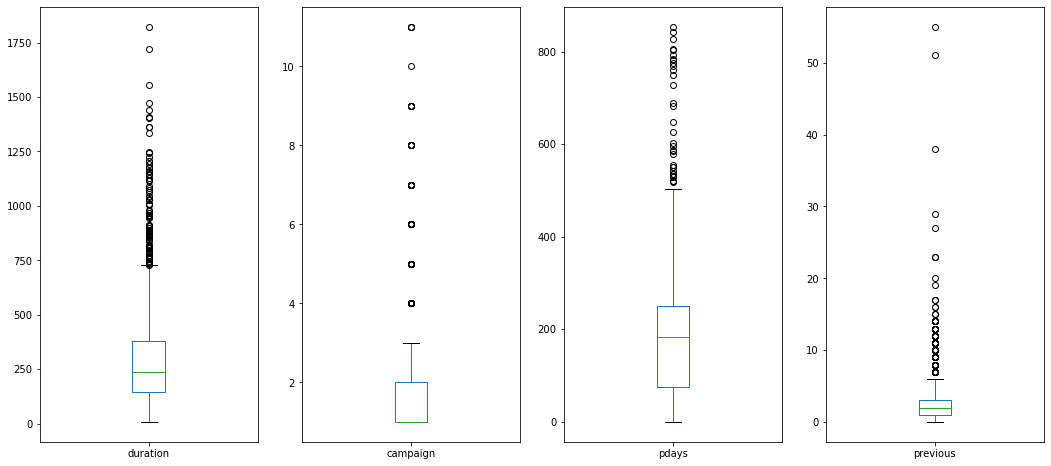

In [3]:
df[['duration','campaign','pdays','previous']].plot(kind='box', subplots =True, sharex=False, sharey=False, figsize=(18,8))
plt.show()

**Box and Whisker Plots**

I excluded the other attributes because I wanted to focus on these 4 that are related to my question. At a quick glance: 
- All of them have quite a number outliers above the third quartile (75th percentile), so the max/top 'whisker' is longer than the bottom one
- The distributions have a left skew because the median lines (horizontal green lines in the box) are generally closer to the bottom of the box instead of the middle of the box which normal distributions would have. `pdays`'s median line is showing more of a normal/right skew because the distribution of data points is a bit more spread out with multiple peaks
- The boxes are relatively small, also showing that there's a large concentration of data points towards the direction of the skewness since the box is near the bottom of the plot, which we already know from looking at the histogram

Overall, the information that the box and whisker plot shows is aligned with what was discussed with the histograms so I won't go into too much detail. 

### C.2 Distribution Analysis for Categorical Attributes

In [5]:
df_campaign = df.groupby('campaign').size().to_frame(name='Count')
df_campaign['Percentage'] = (df_campaign['Count'] / df_campaign['Count'].sum()) * 100
df_previous = df.groupby('previous').size().to_frame(name='Count')
df_previous['Percentage'] = (df_previous['Count'] / df_previous['Count'].sum()) * 100

print('"Poutcome" for all - Count & %')
df_poutcome = df.groupby('poutcome').size().to_frame(name='All_Count')
df_poutcome['All_Percentage'] = (df_poutcome['All_Count'] / df_poutcome['All_Count'].sum()) * 100
display(df_poutcome)

print()
print('"Poutcome" for yes subscribed - Count & %')
df_poutcome_success = df.loc[df['subscribed'] == 'yes'].groupby('poutcome').size().to_frame(name='Success_Count')
df_poutcome_success['Success_Percentage'] = (df_poutcome_success['Success_Count'] / df_poutcome_success['Success_Count'].sum()) * 100
display(df_poutcome_success)

print()
print('"Poutcome" for no subscribed - Count & %')
df_poutcome_failure = df.loc[df['subscribed'] == 'no'].groupby('poutcome').size().to_frame(name='Failure_Count')
df_poutcome_failure['Failure_Percentage'] = (df_poutcome_failure['Failure_Count'] / df_poutcome_failure['Failure_Count'].sum()) * 100
display(df_poutcome_failure)

"Poutcome" for all - Count & %


All_Count  All_Percentage
poutcome                           
failure         955       61.772316
other           147        9.508409
success         444       28.719276


"Poutcome" for yes subscribed - Count & %


Success_Count  Success_Percentage
poutcome                                   
failure             167           23.455056
other               111           15.589888
success             434           60.955056


"Poutcome" for no subscribed - Count & %


Failure_Count  Failure_Percentage
poutcome                                   
failure             788           94.484412
other                36            4.316547
success              10            1.199041

In [154]:
df['poutcome'].value_counts(ascending=True).plot(kind='bar')
plt.xlabel('poutcome')
plt.ylabel('Number of Clients')
plt.title('Clients by poutcome (All data)')
plt.show()

Simple overview of the `poutcome` bar graphs show that most old clients did not subscribe to other campaigns. From Section B.2, we know that the ratios become 50/50 for yes/no campaign `subscribed`. Let's dig deeper below on the change from before and after the current campaign...

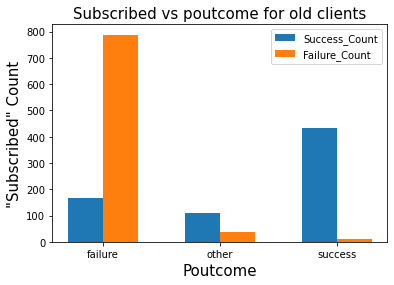

In [8]:
plt.bar(df_poutcome_success.index, df_poutcome_success['Success_Count'], align='edge', width=-0.3, label='Success_Count')
plt.bar(df_poutcome_failure.index, df_poutcome_failure['Failure_Count'], align='edge', width=0.3, label='Failure_Count')
plt.title('Subscribed vs poutcome for old clients', size=15)
plt.ylabel('"Subscribed" Count', size=15)
plt.xlabel('Poutcome',size=15)
plt.legend()

**Bar Graphs**

The above grouped bar graph digs further into what we found about `poutcome` in B.2. This bar graph only includes old clients. Section B.2.1 only looks at new clients, so we want to explore the chance in subscribed status for existing clients. We can see that old clients that previously did not subscribe would likely not subscribe in the current campaign (94.48%, the tallest orange bar). Alternatively, clients that previously subscribed would do the same for this campaign (60.955%, tallest blue bar). For clients that didn't decide in previous campaigns (middle group), it is more likely that they will subscribe to the current campaign (15.59%, middle blue bar).

The good news is that there seems to be growth in the number of subscribed clients from the 'failure' and 'success' groups. When we look at the left blue bar (previously failed subscriptions that ended in a subscription, 167 count) vs the right orange bar (previously successful subscriptions that ended up in no subscription, 10 count), there is a net increase in subscribed old clients of 157. If we include the 'other' group, that's a total of 268 subscribed old clients (157 + 111).

*We can conclude that having some familiarity with the bank & its promos would increase the chance for 'yes' subscribed status in the current campaign.*

### C.3 Combined Distribution Analysis

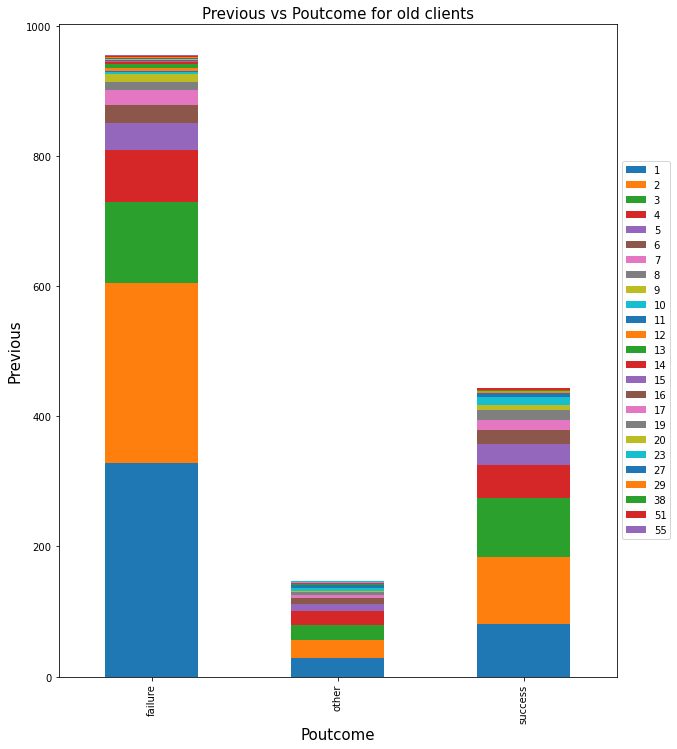

In [9]:
crosstab_CL = pd.crosstab(df['poutcome'], df['previous'])
crosstab_CL.plot(kind='bar', stacked=True, figsize=(10,12))
plt.title('Previous vs Poutcome for old clients', size=15)
plt.ylabel('Previous', size=15)
plt.xlabel('Poutcome', size=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Stacked Bar Graph**

A lot of old customers usually gave a reply on `poutcome` fairly quickly (by `previous` = 5 contact or earlier, since `previous` could include many campaigns previously). The proportion of each "previous" category appears to be relatively even between the "failure", "other" and "success" bars, that is, the majority of clients have a `previous` value between 1-5. With that said, we do visually see that greater `previous` values compose a larger percentage of the "success" bar vs the "failure" bar so campaign success has historically been greater when there have been more contacts. *So, higher familiarity and frequency/occurrence that a client has would lead to more likely subscription.*

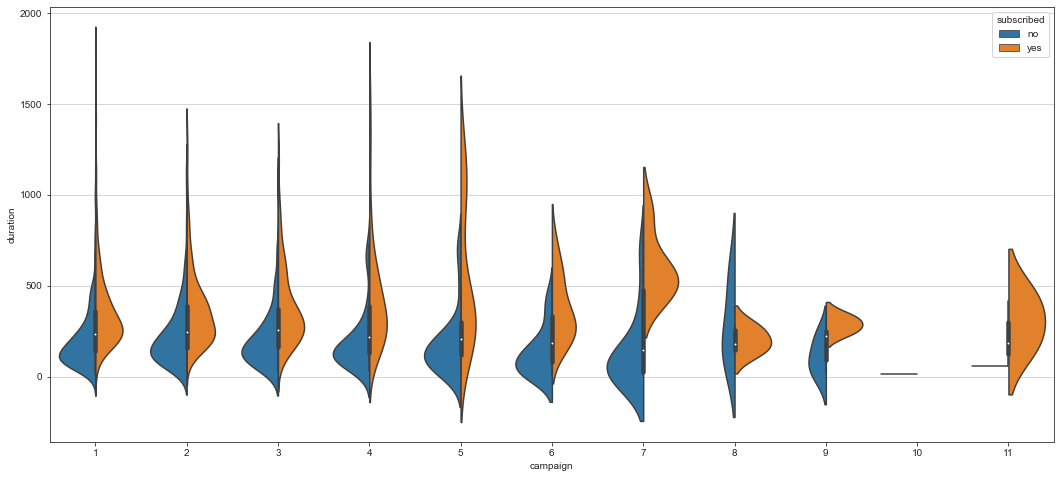

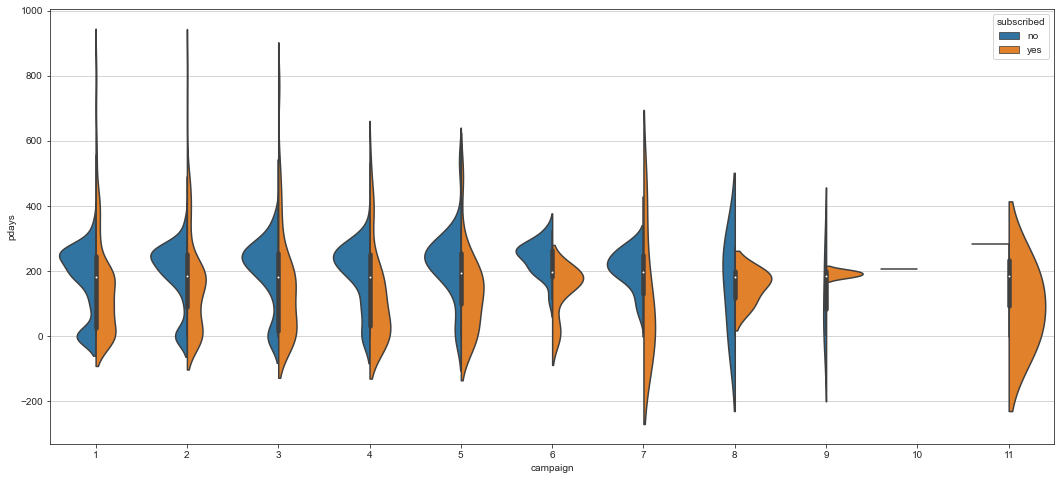

In [68]:
plt.figure(figsize=(18,8))
sns.violinplot(x=df['campaign'], y=df['duration'], hue=df['subscribed'], split=True)
plt.show()

plt.figure(figsize=(18,8))
sns.violinplot(data=df, x='campaign', y='pdays', hue='subscribed', split=True)
plt.show()

#### C.3.1 Campaign 11 Clients (Appendix)

In [173]:
display(df.loc[df['campaign'] == 11])

age           job  marital  education default  balance housing loan  \
763   28.0   blue-collar   single  secondary      no      387     yes   no   
1232   NaN       student   single  secondary      no      431      no   no   
1421  32.0  entrepreneur  married   tertiary      no      762      no   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
763   cellular   13   mar        61        11    282         1    other   
1232  cellular   19   aug       418        11    185         5  success   
1421  cellular   19   jul       187        11     -1         0      NaN   

     subscribed  
763          no  
1232        yes  
1421        yes

**Violinplots** 

1. *campaign vs duration* - 
    - `campaign` = 1 to 7, longer calls more likely lead to success. When the `campaign` value is smaller, calls tend to be longer for successful subscriptions vs failures, maybe because more time is spent to explain/sell the promo to clients. In fact, as `campaign` value increases, we see a slight increase in call `duration` for success and a slight decrease in call duration for failures. 
    - `campaign` =  8 to 10, led to fewer yes subscribed and the calls generally get shorter - maybe, they already know about the promo and don't need that much info
    - The outlier is for `campaign` = 11, where there's actually some longer calls that actually led to success even for longer calls. It can be really hard to say why just by looking at duration and campaign, but if we filter the dataframe by campaign = 11 (see C.3.1), they had `poutcome` = success/other/NaN (new client) - as  aforementioned, typically these type of clients had a higher chance of `subscribed` = yes)


2. *campaign vs pdays* - 
    - For the blue and orange hues, we see 2 blue peaks at around `pdays` ~ 0 (from new clients) and ~225 (possibly when the previous campaign happened). We can see a lot of orange area for `pdays` below 0 because new clients with `pdays` = -1, as we learned before, are more likely to subscribe 'yes'
    - Consistent with the correlation matrix in B.1, `duration` and `pdays` have a negative correlation (-0.09565), so the actual "violin" shape is opposite with the first violinplot. For example, in `campaign` = 1, the left/blue bottom side of the violin is more pronounced for the campaign vs duration plot, whereas the campaign vs pdays plot has a more pronounced left top side. The same principle is true for the right/orange side of the violin.
    - As `campaign` increases, it looks like `pdays` is decreasing --> but this could just be because there are fewer data points as `campaign` increases and a new client with `pdays` = -1 will have a greater effect on the location of the box (pull it further down). In the B.1 correlation matrix, these 2 attributes only have a correlation of 0.030929, which makes them not very correlated at all
    - Lower `pdays` is normally successful as the 'yes' orange plot follows the box more. A large chunk of the 'no' blue plot is above the median. 

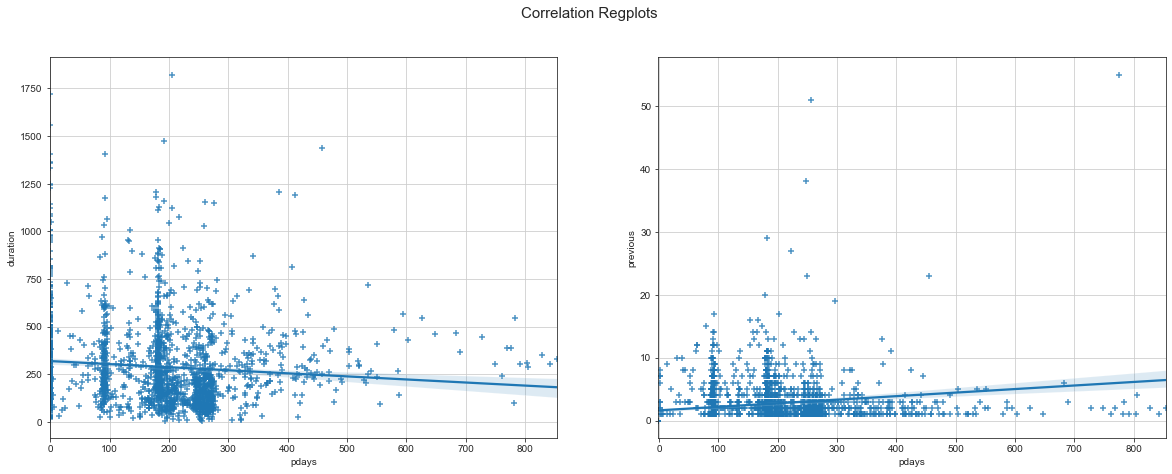

In [70]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20, 7))
fig.suptitle('Correlation Regplots', size=15)
sns.regplot(data=df, x='pdays', y='duration', marker='+', ax=ax0)
sns.regplot(data=df, x='pdays', y='previous', marker='+', ax=ax1)
plt.show()

**Regplots**

I wanted to revisit the information found with the correlation matrix and pairwise plot in Section B.1 and look more into the `pdays` attribute. We know that the inputs have really small correlation with each other, and visually it was a bit hard to see if there's any linearity to the data. Using the regplots, we do visually get a weak linear relationship between `pdays/duration` (negative) and `pdays/previous` (positive), drawn by the line of best fit. That is, `duration` decreases as `pdays` increases and `previous` increases as `pdays` increases. See B.1 correlation matrix conclusion for more details.

### Conclusion Section C - Distribution Analysis

**Recap of my question**

*How would familiarity (with the bank), frequency/occurrence and duration of customer contacts affect success of the term deposit campaign?*

**Preliminary Conclusion**

*Familiarity & Frequency/occurrence*
1. `campaign`: Same as before, this on its own doesn't say much. See `duration` conclusion below.
2. `pdays`: Same as B.2, lower `pdays` generally means higher success
3. `previous`: Same with section B.2, higher value usually means success for old clients
4. `poutcome`: Section C.2 grouped bar graph agrees with section B, where old clients that subscribed are more likely to subscribe again and new clients are also more likely to subscribe. New information that we did gain in section C.2 is that there is a net growth in successful subscription in the current campaign. We can conclude that generally, some familiarity would indeed increase the success rate. 

*Duration*
1. `duration`: `duration` increases as the number of `campaign` contacts increases. In these cases, the chance of success is higher compared to failures that generally have a shorter `duration`. Although, there appears to be a turning point where too many number of contacts lead to shorter call durations and less success, so it's important to have a fine balance between overdoing it with the frequency/occurrence and duration aspects of my question.

**Final Conclusion for Etivity**

More often than not, greater familiarity, frequency/occurrence, and duration-type attributes together do indeed lead to greater probability of 'yes' `subscribed` result.